# Regridding debugging

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from pprint import pprint
from astropy.io import fits

base_dir = '/mnt/hpc_backup/yanitski/projects/pdr/KT3_history/MilkyWay/'

## Correct dust file header

data shape still contains velocity axis

In [21]:
os.system('ls')

model_comparison.ipynb
model_selection_debugging.ipynb
regridding_debugging.ipynb
regrid.py


0

In [30]:
base_dir = '/mnt/hpc_backup/yanitski/projects/pdr/KT3_history/MilkyWay/'
models = os.listdir(base_dir)
for model in models:
    if os.path.exists(base_dir + model + '/channel_intensity.fits'):
        os.system('mv ' + base_dir + model + '/channel_intensity.fits ' + base_dir + model + '/synthetic_intensity.fits')
    if os.path.exists(base_dir + model + '/synthetic_intensity.fits'):
        print(model)
        data = fits.open(base_dir + model + '/synthetic_intensity.fits')
        if len(data[2].shape) == 4:
            hdul = fits.HDUList()
            hdul.append(data[0])
            hdul.append(data[1])
            del data[2].header['CTYPE4']
            del data[2].header['CUNIT4']
            del data[2].header['CRVAL4']
            del data[2].header['CDELT4']
            del data[2].header['CRPIX4']
            hdul.append(data[2])
            hdul.writeto(base_dir + model + '/synthetic_intensity.fits', overwrite=True)

r400_cm0.5-1.0_d2.0_uv10
r400_cm1.0-1.0_d1.0_uv10
r400_cm2.0-1.0_d0.5_uv100
r400_cm4.0-1.0_d0.5_uv10
r400_fcm0.5_cm-1_2
r400_fcm1.0_ficm4.0
r400_fcm4.0_ficm2.0
r400_ficm0.5_icm-2_-1
r400_hi0.4_f_fuv0.10_const_fuv1.0
r400_hi0.6_f_fuv0.10_const_fuv1.0
r400_hi0.8_f_fuv0.10_const_fuv1.0
r400_hi1.0_f_fuv0.10_const_fuv1.4
r400_hi1.0_f_fuv1000.00_const_fuv1.0
r400_rcmz1400
r400_rcmz2800
r400_rcmz800_uv10
r500_fcm0.5_fim4.0
r500_fuv1
r500_rcmz1000_fuv31
r100_cm1.0-1.0_d1.0_uv10
r100_cm1.0-1.0_d1.0_uv100
r200_cm0.5-1.0_d0.5_uv10
r200_cm0.5-1.0_d0.5_uv100
r200_cm0.5-1.0_d1.0_uv10
r200_cm0.5-1.0_d1.0_uv100
r200_cm1-1_d1_uv10
r200_cm1-1_d1_uv100
r200_cm4-1_d2_uv100
r400_cm0.5-1.0_d0.5_uv10
r400_cm0.5-1.0_d0.5_uv100
r400_cm0.5-1.0_d1.0_uv10
r400_cm0.5-1.0_d1.0_uv100
r400_cm0.5-1.0_d2.0_uv100
r400_cm0.5-1.0_d4.0_uv10
r400_cm0.5-1.0_d4.0_uv100
r400_cm0.5-2.0_d0.5_uv10
r400_cm0.5-2.0_d0.5_uv100
r400_cm0.5-2.0_d1.0_uv10
r400_cm0.5-2.0_d1.0_uv100
r400_cm0.5-2.0_d2.0_uv10
r400_cm0.5-2.0_d2.0_uv100
r400_c

## Compare sightlines

In [ ]:
sl1 = np.open(bas_dir)

## Compare voxel data

In [3]:
# origin at index 3174
mod_eps = fits.open(base_dir + 'r400_fhi1.0_fuv10/species_emissivity.fits')
mod_eps_new = fits.open(base_dir + 'r400_modtest_new/species_emissivity.fits')
modd_eps = fits.open(base_dir + 'r400_fhi1.0_fuv10/dust_emissivity.fits')
modd_eps_new = fits.open(base_dir + 'r400_modtest_new/dust_emissivity.fits')
vox = fits.open(base_dir + 'r400_fhi1.0_fuv10/voxel_position.fits')
vox_new = fits.open(base_dir + 'r400_modtest_new/voxel_position.fits')
fuv = fits.open(base_dir + 'r400_fhi1.0_fuv10/voxel_fuv.fits')
fuv_new = fits.open(base_dir + 'r400_modtest_new/voxel_fuv.fits')
rho = fits.open(base_dir + 'r400_fhi1.0_fuv10/voxel_density.fits')
rho_new = fits.open(base_dir + 'r400_modtest_new/voxel_density.fits')
mass = fits.open(base_dir + 'r400_fhi1.0_fuv10/voxel_ensemble_mass.fits')
mass_new = fits.open(base_dir + 'r400_modtest_new/voxel_ensemble_mass.fits')

In [69]:
total = True
i_vox = 50  # 3174 for center
i_new = 1
n_vox = mass[0].header['NAXIS2']
species = mod_eps[0].header['SPECIES'].split(', ')
species_new = mod_eps_new[0].header['SPECIES'].split(', ')
dust = modd_eps[0].header['DUST'].split(', ')
dust_new = modd_eps_new[0].header['DUST'].split(', ')
print('Index: {}'.format(i_vox))
print('Mass: {}, {}'.format(np.log10(mass[0].data[i_vox]), np.log10(mass_new[0].data[i_vox])))
print('Density: {}, {}'.format(np.log10(rho[0].data[i_vox]), np.log10(rho_new[0].data[i_vox])))
print('FUV: {}, {}'.format(np.log10(fuv[0].data[i_vox]), np.log10(fuv_new[0].data[i_vox])))
print()
print('{}, {}     {}     {}'.format('Old'.rjust(8), 'New'.rjust(8), 'Emmisivity'.center(20), 'Ratio'))
print()
for i in range(27):
    print('{}, {} --> '.format(species[i].rjust(8), species_new[i].rjust(8)) + '{:.3e}, {:.3e} --> '.format(mod_eps[0].data[i_vox, :, i].max(), mod_eps_new[0].data[i_vox, :, i].max()) + '{:.3f}'.format((mod_eps_new[0].data[i_vox, :, i].max()-mod_eps[0].data[i_vox, :, i].max())/mod_eps[0].data[i_vox, :, i].max()))
print()
print('{}, {} --> '.format(dust[0].rjust(8), dust_new[i_new].rjust(8)) + '{:.3e}, {:.3e} --> '.format(modd_eps[0].data[i_vox, 0], modd_eps_new[0].data[i_vox, i_new]) + '{:.3f}'.format((modd_eps_new[0].data[i_vox, i_new]-modd_eps[0].data[i_vox, 0])/modd_eps[0].data[i_vox, 0]))

if total:
    ratio = []
    for i_vox in range(n_vox):
        ratio.append(((mod_eps_new[0].data[i_vox, :, :].max(0)-mod_eps[0].data[i_vox, :, :].max(0))/mod_eps[0].data[i_vox, :, :].max(0)).max())
        ratio.append((modd_eps_new[0].data[i_vox, i_new]-modd_eps[0].data[i_vox, 0])/modd_eps[0].data[i_vox, 0])
    print()
    print('Maximum ratio in dataset:', np.abs(ratio).max())

Index: 50
Mass: [4.00195233 4.00195233], [4.00195233 4.00195233]
Density: [3.37970967 3.28126069], [3.37970967 3.28126069]
FUV: [0. 0.], [0. 0.]

     Old,      New          Emmisivity          Ratio

    C+ 1,     C+ 1 --> 1.402e-06, 1.426e-06 --> 0.017
     C 1,      C 1 --> 2.213e-06, 2.250e-06 --> 0.017
     C 2,      C 2 --> 5.087e-07, 5.188e-07 --> 0.020
    CO 1,     CO 1 --> 5.744e-06, 5.839e-06 --> 0.017
    CO 2,     CO 2 --> 4.493e-06, 4.566e-06 --> 0.016
    CO 3,     CO 3 --> 2.191e-06, 2.228e-06 --> 0.017
    CO 4,     CO 4 --> 7.625e-07, 7.772e-07 --> 0.019
    CO 5,     CO 5 --> 2.573e-07, 2.638e-07 --> 0.025
    CO 6,     CO 6 --> 5.145e-08, 5.449e-08 --> 0.059
    CO 7,     CO 7 --> 5.347e-09, 7.602e-09 --> 0.422
    CO 8,     CO 8 --> 2.852e-09, 5.065e-09 --> 0.776
  13C+ 1,   13C+ 1 --> 2.676e-08, 2.933e-08 --> 0.096
   13C 1,    13C 1 --> 3.745e-08, 4.021e-08 --> 0.074
   13C 2,    13C 2 --> 1.034e-08, 1.267e-08 --> 0.225
  13CO 1,   13CO 1 --> 1.740e-06, 1.772e-06

In [20]:
np.where(vox[0].data.any(1)==0)[0], np.where(vox_new[0].data.any(1)==0)[0]

(array([3174]), array([3174]))

In [66]:
mod_eps[0].shape, mod_eps_new[0].shape

((6349, 701, 1), (6349, 2))

In [21]:
def plot_model_residual(quantity='emissivity', species=False, dust=False, i=0, log=False,
                        base_dir='/mnt/hpc_backup/yanitski/projects/pdr/KT3_history/MilkyWay/', 
                        old_dir='r400_hi1.0_f_fuv1.00_const_fuv1.8', new_dir='r400_modtest'):
    if species:
        mod_eps = fits.open(base_dir + old_dir + '/species_' + quantity + '.fits')
        mod_eps_new = fits.open(base_dir + new_dir + '/species_' + quantity + '.fits')
        data_max = (mod_eps[0].data[:, 0, i].max(), mod_eps_new[0].data[:, 0, i].max())
        data_min = (mod_eps[0].data[:, 0, i].min(), mod_eps_new[0].data[:, 0, i].min())
        res = np.abs(mod_eps[0].data[:, 0, i]-mod_eps_new[0].data[:, 0, i])
    elif dust:
        mod_eps = fits.open(base_dir + old_dir + '/dust_' + quantity + '.fits')
        mod_eps_new = fits.open(base_dir + new_dir + '/dust_' + quantity + '.fits')
        data_max = (mod_eps[0].data[:, 0, i].max(), mod_eps_new[0].data[:, i].max())
        data_min = (mod_eps[0].data[:, 0, i].min(), mod_eps_new[0].data[:, i].min())
        res = np.abs(mod_eps[0].data[:, 0, i]-mod_eps_new[0].data[:, i])
    print('Maximum data (old, new):', data_max)
    print('Minimum data (old, new):', data_min)
    print('Maximum residual:', res.max())
    i_nan = res == 0
    logres = np.log10(res[~i_nan])
    fig, ax = plt.subplots()
    if log:
        ax.boxplot(logres[~i_nan])
        ax.set_ylabel(r'log$_{10}$ res')
    else:
        ax.boxplot(res[~i_nan])
        ax.set_ylabel('res')
    return fig, ax

In [129]:
arr = np.arange(125).reshape(5, 5, 5)
arr[:, [[3]], :].shape

(5, 1, 1, 5)

Maximum data (old, new): (4.441638188871026e-05, 1.953127759580928e-06)
Minimum data (old, new): (2.657948445691989e-08, 1.9120399984688484e-07)
Maximum residual: 4.246325412912933e-05


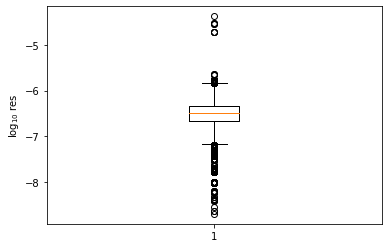

In [34]:
fig, ax = plot_model_residual(dust=True, i=0, log=True)

In [91]:
# mod_old = fits.open(base_dir + 'r450_fuv1.8-1.8/synthetic_intensity.fits')
mod_T_old = fits.open(base_dir + 'r400_fhi1.0_fuv10/synthetic_intensity.fits')
mod_T_new = fits.open(base_dir + 'r200_convergence/synthetic_intensity.fits')
mod_tau_old = fits.open(base_dir + 'r400_fhi1.0_fuv10/synthetic_optical_depth.fits')
mod_tau_new = fits.open(base_dir + 'r200_convergence/synthetic_optical_depth.fits')

In [51]:
mod_T_new[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                   27                                                  
NAXIS2  =                  721                                                  
NAXIS3  =                    9                                                  
NAXIS4  =                  701                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
TYPE    = 'Species transitions'                                                 
BUNIT   = 'K       '                                                            
DIREC   = 'Radial  '                                                            
CTYPE1  = 'Wavelength'      

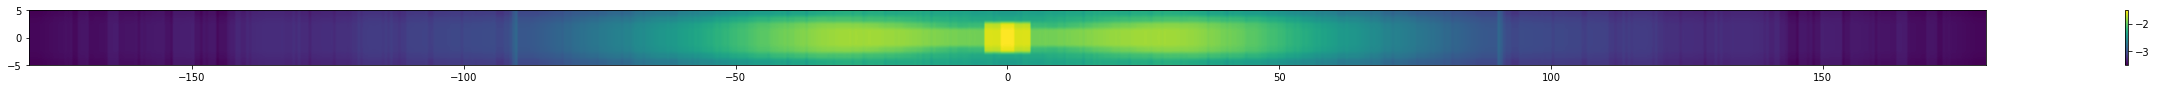

In [92]:
plt.figure(figsize=(50, 1))
cm = plt.imshow(np.log10(mod_T_old[2].data[:, :, 0]), extent=(-180, 180, -5, 5))
plt.colorbar(cm)

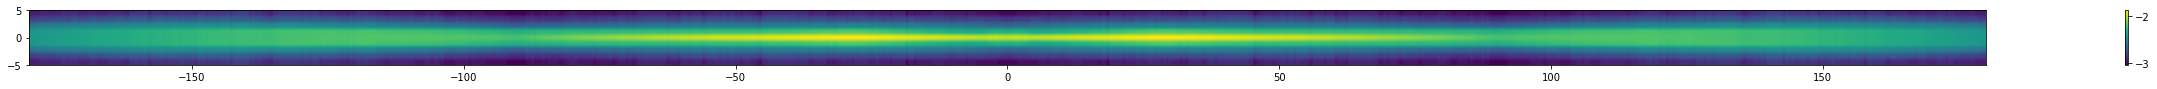

In [93]:
plt.figure(figsize=(50, 1))
cm = plt.imshow(np.log10(mod_T_new[2].data[:, :, 1]), extent=(-180, 180, -5, 5))
plt.colorbar(cm)

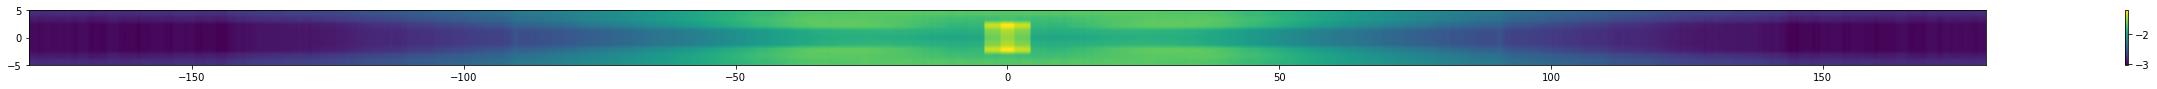

In [94]:
plt.figure(figsize=(50, 1))
cm = plt.imshow(np.log10(mod_tau_old[2].data[:, :, 0]), extent=(-180, 180, -5, 5))
plt.colorbar(cm)

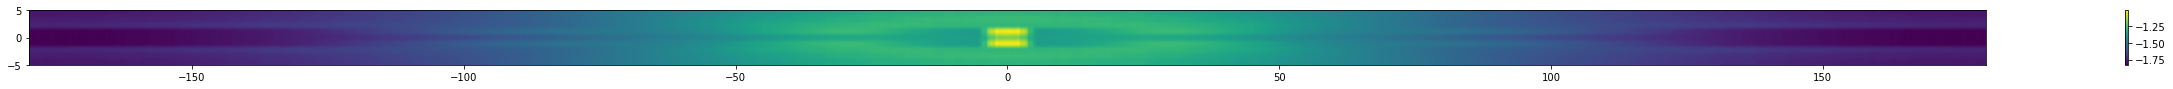

In [95]:
plt.figure(figsize=(50, 1))
cm = plt.imshow(np.log10(mod_tau_new[2].data[:, :, 1]), extent=(-180, 180, -5, 5))
plt.colorbar(cm)

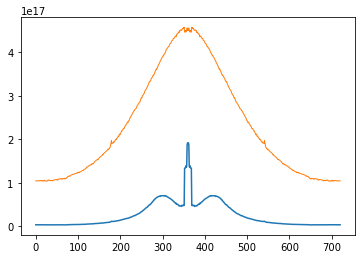

In [42]:
plt.plot(mod_old[2].data[2, :, 0])
plt.plot(mod_new[2].data[4, :, 0], lw=1)

## Misc.

In [46]:
fuv[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / element size                                   
NAXIS   =                    2 / number of axes                                 
EXTEND  =                    T                                                  
NAME    = 'FUV     '                                                            
UNITS   = 'Draine  '                                                            
NAXIS1  =                    2                                                  
CTYPE1  = 'Transition/wavelength'                                               
CUNIT1  = 'm       '                                                            
CRPIX1  = 'N/A     '                                                            
CRVAL1  = 'N/A     '                                                            
CDELT1  = 'N/A     '                                                            
NAXIS2  =                 63

In [45]:
fuv = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/KT3_history/MilkyWay/r400_modtest/voxel_fuv.fits')
print(fuv[0].data.max(0))
header_copy = fits.Header()
for card in fuv[0].header.cards:
    if card[0]=='COMMENT':
        header_copy.add_comment(card[1:])
header_copy

[1.45527067 1.45527067]


COMMENT --------------------------------------------------                      
COMMENT                 Model Information                                       
COMMENT --------------------------------------------------                      
COMMENT It is necessary to have a record of the                                 
COMMENT relevant model information in each file,                                
COMMENT so below we record the relevant information                             
COMMENT defining the model parameters.                                          
COMMENT                                                                         
COMMENT                       Model                                             
COMMENT                                                                         
COMMENT Model shape: disk                                                       
COMMENT           x: 36000.0                                                    
COMMENT           y: 36000.0

In [6]:
eps = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/KT3_history/MilkyWay/r400_modtest/species_emissivity.fits')
print(eps[0].data.mean(0).max(0))

[6.39360551e-05 2.34595275e-05 2.23360037e-05 3.30644837e-05
 2.80886602e-05 2.58309424e-05 2.43841817e-05 2.34296664e-05
 2.27704801e-05 2.22520939e-05 2.18814884e-05 2.20164848e-05
 2.27900144e-05 2.19538391e-05 3.13501246e-05 2.68620723e-05
 2.49591694e-05 2.37040676e-05 2.28346332e-05 2.23120543e-05
 2.20276197e-05 2.18481333e-05 3.24017716e-05 2.65229863e-05
 2.45644232e-05 2.35862099e-05 2.29999535e-05]


In [47]:
obs_intensity = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/KT3_history/MilkyWay/r400_modtest/synthetic_intensity.fits')
obs_optical_depth = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/KT3_history/MilkyWay/r400_modtest/synthetic_optical_depth.fits')

In [3]:
obs[0].shape, obs[1].shape, obs[2].shape

IndexError: list index out of range

In [5]:
obs_intensity[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                   27                                                  
NAXIS2  =                  361                                                  
NAXIS3  =                    5                                                  
NAXIS4  =                  701                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
TYPE    = 'Species transitions'                                                 
BUNIT   = 'K       '                                                            
DIREC   = 'Radial  '                                                            
CTYPE1  = 'Wavelength'      

In [40]:
obs_optical_depth[2].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                    2                                                  
NAXIS2  =                  361                                                  
NAXIS3  =                    5                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
TYPE    = 'Dust continuum'                                                      
BUNIT   = 'N/A     '                                                            
DIREC   = 'Radial  '                                                            
CTYPE1  = 'Wavelength'                                                          
CUNIT1  = 'm       '        

In [32]:
'Model'.center(50, '-')

'----------------------Model-----------------------'

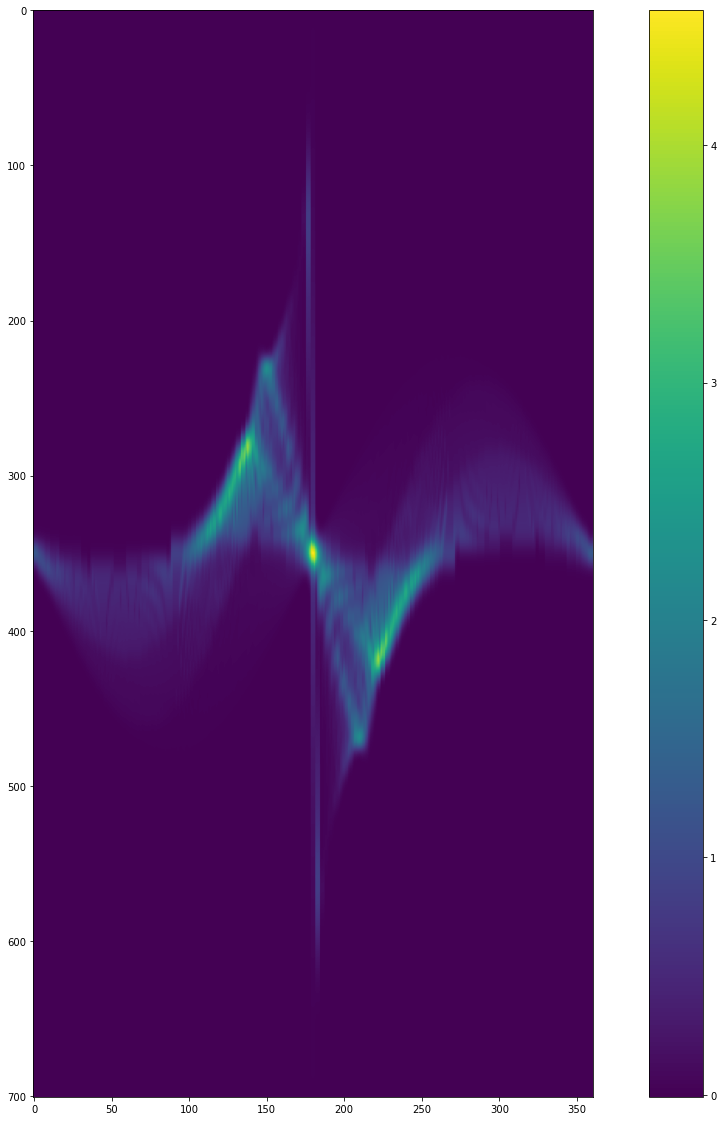

In [48]:
plt.figure(figsize=(20, 20))
log = False
i = 3
if log:
    cm = plt.imshow(np.log10(obs_intensity[1].data[:, :, :, i].sum(1)-obs_intensity[2].data.sum(0).mean(1)))
else:
    cm = plt.imshow(obs_intensity[1].data[:, :, :, i].sum(1)-obs_intensity[2].data.sum(0).mean(1))
plt.colorbar(cm)

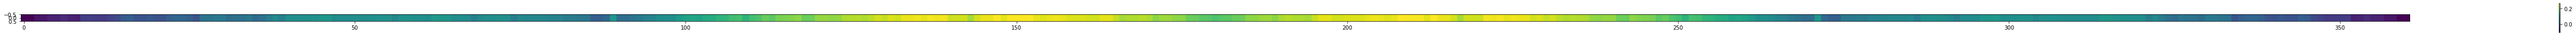

In [20]:
plt.figure(figsize=(100, 1))
cm = plt.imshow(np.log10(obs_intensity[2].data.sum(0).mean(1)).reshape(1, -1))
plt.colorbar(cm)

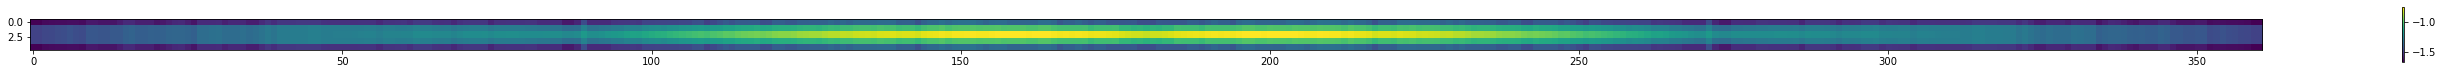

In [49]:
plt.figure(figsize=(50, 1))
cm = plt.imshow(np.log10(obs_optical_depth[2].data[:, :, 0]))
plt.colorbar(cm)

In [16]:
(obs[0].data > .0005).all()

False

In [43]:
ix = np.where(obs[0].data[974] > 0.00005)
obs[0].data[(974, *ix)]

array([5.04042723e-05, 5.74905120e-05, 6.45767516e-05, 7.13157982e-05,
       5.43183094e-05, 7.70669450e-05, 5.92447394e-05, 8.28180918e-05,
       6.41711693e-05, 8.85692386e-05, 6.90975993e-05, 9.43203853e-05,
       7.40240292e-05, 1.00071532e-04, 7.89504591e-05, 5.02643522e-05,
       9.77462940e-05, 7.69586611e-05, 9.19951472e-05, 7.20322312e-05,
       8.62440004e-05, 6.71058012e-05, 8.04928536e-05, 6.21793713e-05,
       7.47417069e-05, 5.72529414e-05, 6.87979636e-05, 5.21535044e-05,
       6.17117240e-05, 5.46254843e-05])

In [34]:
ix

(array([348]), array([3]))

In [2]:
mission = 'COBE-FIRAS'

path = '/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/'
files = os.listdir(path + mission)

for file in files:
    if file != 'regridded':
        obs = fits.open(path + mission + '/' + file)
        print(file)
        print()
        pprint(obs[0].header)
        print()
        pprint(obs[1].header)
        print('\n-------------\n')

FIRAS_LINE_EMISSION_MAP_HIGH.FITS

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
DATE    = '03/12/97'           / FITS file creation date (dd/mm/yy)             
ORIGIN  = 'CDAC    '           /  Cosmology Data Analysis Center                
TELESCOP= 'COBE    '           /  COsmic Background Explorer satellite          
INSTRUME= 'FIRAS   '           /  COBE instrument [DIRBE, DMR, FIRAS]     

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  361                                                  
NAXIS2  =                  181                                                  
NAXIS3  =                  701                                                  
CTYPE1  = 'GLON-CAR'                                                            
CRVAL1  =                    0                                                  
CDELT1  =                    1                                                  
CRPIX1  =                  181                                                  
CTYPE2  = 'GLAT-CAR'                                                            
CRVAL2  =                    0                                                  
CDELT2  =                   

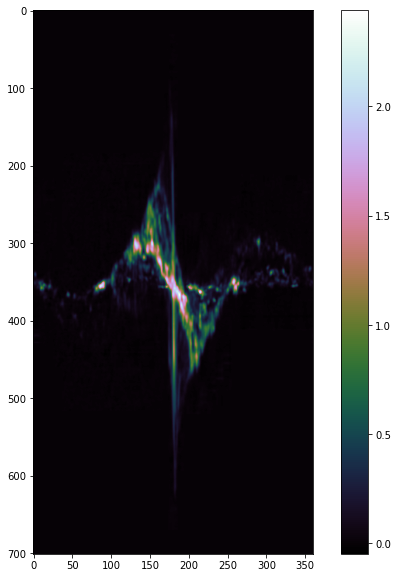

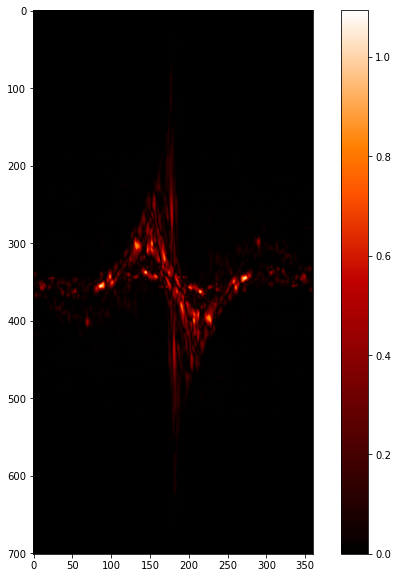

In [13]:
%matplotlib inline

from kosmatau3d import comparison as comp

mission = 'COGAL'

obs = fits.open(path + mission + '/regridded/temp/co1_test_regridded.fits')
pprint(obs[0].header)
print(obs[0].shape)
print(obs[0].data.max(), obs[0].data.mean())
plt.figure(figsize=(10, 10))
cm = plt.imshow(obs[0].data[:, 90, :], cmap='cubehelix')
plt.colorbar(cm)
plt.show()
i_nan = np.isnan(obs[0].data)
obs_error = np.zeros_like(obs[0].data)
obs_error[~i_nan] = comp.error_correction(obs[0].data[~i_nan], conf='axisymmetric')
plt.figure(figsize=(10, 10))
cm = plt.imshow(obs_error[:, 90, :], cmap='gist_heat')
plt.colorbar(cm)
plt.show()

In [12]:
obs_error.shape

(701, 361)

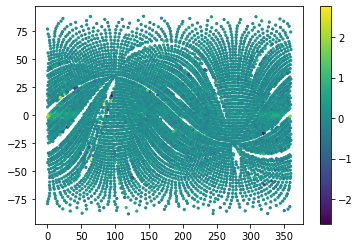

In [15]:
obs = fits.open(path + mission + '/FIRAS_LINE_EMISSION_MAP_HRES.FITS')
cm = plt.scatter(obs[1].data['GAL_LON'], obs[1].data['GAL_LAT'], c=obs[1].data['LINE_FLU'][:, 2], s=5)
plt.colorbar(cm)

In [17]:
import healpy as hp

mission = 'Planck'
file = '/COM_CompMap_IQU-thermaldust-gnilc-unires_2048_R3.00.fits'#'/COM_CompMap_Dust-GNILC-Radiance_2048_R2.00.fits'#
obs = fits.open(path + mission + file)
pprint(obs[1].header)

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   36 / width of table in bytes                        
NAXIS2  =             50331648 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    9 / number of fields in each row                   
COMMENT  -------------------------------------------------------------          
COMMENT  Products from GNILC component separation method                        
COMMENT  -------------------------------------------------------------          
COMMENT  Further details in the Planck Legacy Archive and Explanatory Supplement
COMMENT  http://www.cosmos.e

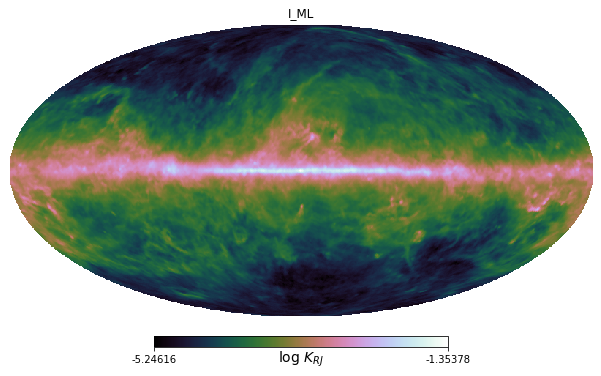

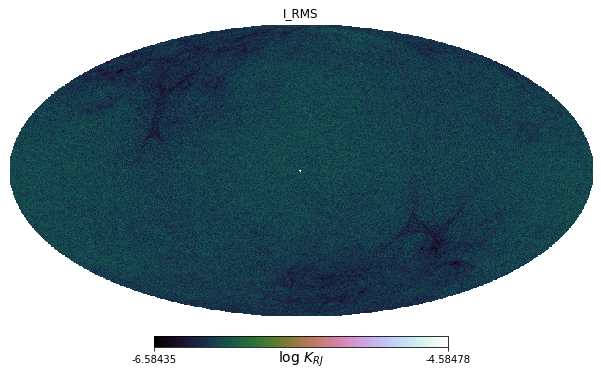

In [23]:
import healpy as hp

mission = 'Planck'
log = True

# Available files:
#  - COM_CompMap_dust-commrul_2048_R1.00.fits
#  - COM_CompMap_dust-commander_0256_R2.00.fits
#  - COM_CompMap_ThermalDust-commander_2048_R2.00.fits
#  - COM_CompMap_Dust-GNILC-F353_2048_R2.00.fits
#  - COM_CompMap_Dust-GNILC-F545_2048_R2.00.fits
#  - COM_CompMap_Dust-GNILC-F857_2048_R2.00.fits
#  - COM_CompMap_Dust-GNILC-Radiance_2048_R2.00.fits
#  - COM_CompMap_IQU-thermaldust-gnilc-unires_2048_R3.00.fits
file = '/COM_CompMap_dust-commander_0256_R2.00.fits'

obs = fits.open(path + mission + file)

if obs[1].header['ORDERING'] == 'NESTED':
    nest = True
else:
    nest = False
    
obs_error = None
if 'commander' in file:
    value = 'I_ML'
    value_error = 'I_RMS'
    obs_data = obs[1].data[value] * 1e-6
    obs_error = obs[1].data[value_error] * 1e-6
    label = r'$K_{RJ}$'
    vmin = None
    vmax = None
elif 'GNILC-F' in file:
    value = 'I'
    freq = int(file.split('F')[1].split('_')[0])
    obs_data = obs[1].data[value] * 32.56 / freq**2
    label = r'$K_{RJ}$'
    vmax = None#1 * 32.56 / freq**2
    vmin = None#0 * 32.56 / freq**2
elif 'GNILC-Radiance' in file:
    value = 'RADIANCE'
    obs_data = obs[1].data[value]
    label = r'$\frac{W}{m^2 s}$'
elif 'commrul' in file:
    value = 'I'
    value_error = 'I_stdev'
    obs_data = obs[1].data[value] * 32.56 / 545**2
    # print(obs_data.min(), obs_data.max())
    # print(obs_data.min() * 32.56 / 545**2, obs_data.max() * 32.56 / 545**2)
    obs_error = obs[1].data[value_error] * 32.56 / 545**2
    # print(obs_error.min(), obs_error.max())
    # print(obs_error.min() * 32.56 / 545**2, obs_error.max() * 32.56 / 545**2)
    label = r'$K_{RJ}$'
    vmin = None
    vmax = None
elif 'gnilc' in file:
    value = 'I_STOKES'
    obs_data = obs[1].data[value]
    label = r'$K_{CMB}$'
    vmin = None
    vmax = None
else:
    exit()
    
if log:
    label = 'log ' + label
    obs_data = np.log10(obs_data)
    if isinstance(obs_error, np.ndarray):
        obs_error = np.log10(obs_error)
    if vmax:
        vmin = max(np.log10(vmin), obs_data.min())
    if vmin:
        vmax = np.log10(vmax)
        
# pprint(obs[1].header)

hp.mollview(obs_data, nest=nest, title=value, cmap='cubehelix', unit=label, min=vmin, max=vmax)
if isinstance(obs_error, np.ndarray):
    hp.mollview(obs_error, nest=nest, title=value_error, cmap='cubehelix', unit=label, min=vmin, max=vmax)

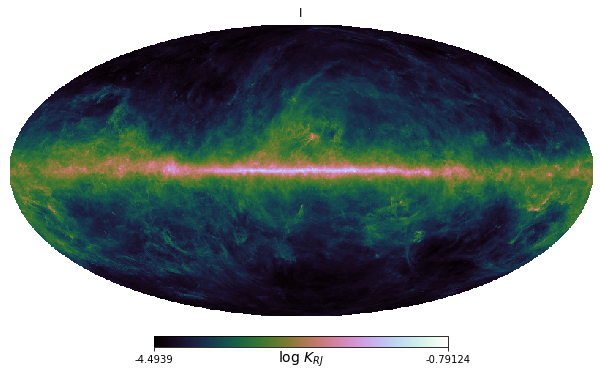

In [16]:
import healpy as hp

mission = 'Planck'
log = True

# Available files:
#  - COM_CompMap_dust-commrul_2048_R1.00.fits
#  - COM_CompMap_dust-commander_0256_R2.00.fits
#  - COM_CompMap_ThermalDust-commander_2048_R2.00.fits
#  - COM_CompMap_Dust-GNILC-F353_2048_R2.00.fits
#  - COM_CompMap_Dust-GNILC-F545_2048_R2.00.fits
#  - COM_CompMap_Dust-GNILC-F857_2048_R2.00.fits
#  - COM_CompMap_Dust-GNILC-Radiance_2048_R2.00.fits
#  - COM_CompMap_IQU-thermaldust-gnilc-unires_2048_R3.00.fits
file = '/COM_CompMap_Dust-GNILC-F857_2048_R2.00.fits'

obs = fits.open(path + mission + file)

if obs[1].header['ORDERING'] == 'NESTED':
    nest = True
else:
    nest = False
    
obs_error = None
if 'commander' in file:
    value = 'I_ML'
    value_error = 'I_RMS'
    obs_data = obs[1].data[value] * 1e-6
    obs_error = obs[1].data[value_error] * 1e-6
    label = r'$K_{RJ}$'
    vmin = None
    vmax = None
elif 'GNILC-F' in file:
    value = 'I'
    freq = int(file.split('F')[1].split('_')[0])
    obs_data = obs[1].data[value] * 32.56 / freq**2
    label = r'$K_{RJ}$'
    vmax = None#1 * 32.56 / freq**2
    vmin = None#0 * 32.56 / freq**2
elif 'GNILC-Radiance' in file:
    value = 'RADIANCE'
    obs_data = obs[1].data[value]
    label = r'$\frac{W}{m^2 s}$'
elif 'commrul' in file:
    value = 'I'
    value_error = 'I_stdev'
    obs_data = obs[1].data[value] * 32.56 / 545**2
    # print(obs_data.min(), obs_data.max())
    # print(obs_data.min() * 32.56 / 545**2, obs_data.max() * 32.56 / 545**2)
    obs_error = obs[1].data[value_error] * 32.56 / 545**2
    # print(obs_error.min(), obs_error.max())
    # print(obs_error.min() * 32.56 / 545**2, obs_error.max() * 32.56 / 545**2)
    label = r'$K_{RJ}$'
    vmin = None
    vmax = None
elif 'gnilc' in file:
    value = 'I_STOKES'
    obs_data = obs[1].data[value]
    label = r'$K_{CMB}$'
    vmin = None
    vmax = None
else:
    exit()
    
if log:
    label = 'log ' + label
    obs_data = np.log10(obs_data)
    if obs_error:
        obs_error = np.log10(obs_error)
    if vmax:
        vmin = max(np.log10(vmin), obs_data.min())
    if vmin:
        vmax = np.log10(vmax)
        
# pprint(obs[1].header)

hp.mollview(obs_data, nest=nest, title=value, cmap='cubehelix', unit=label, min=vmin, max=vmax)
if obs_error:
    hp.mollview(obs_error, nest=nest, title=value_error, cmap='cubehelix', unit=label, min=vmin, max=vmax)

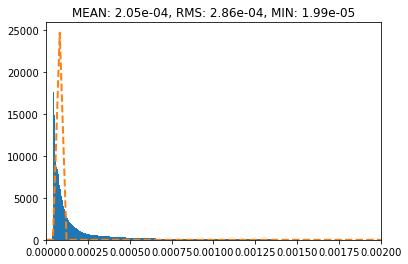

In [241]:
vlim = 0.002
plt.hist(obs_data[obs_data<vlim], bins=500, density=True)
plt.xlim([0, vlim])
x = np.linspace(0, vlim)
y = 25000*np.exp(-(x-8e-5)**2/2/(1e-5)**2)
plt.plot(x, y, ls='--', lw=2)
plt.title('MEAN: {:.2e}, RMS: {:.2e}, MIN: {:.2e}'.format(obs_data[obs_data<vlim].mean(), obs_data[obs_data<vlim].std(), obs_data[obs_data<vlim].min()));

In [3]:
%matplotlib inline

from kosmatau3d import comparison as comp

mission = 'Planck'

obs = fits.open(path + mission + '/regridded/temp/planck_Dust-GNILC-F353_regridded.fits')
pprint(obs[0].header)
print(obs[0].shape)
print(obs[0].data.max(), obs[0].data.mean())
plt.show()
cm = plt.imshow(obs[0].data[:, :][::-1, ::-1], vmin=0, vmax=0.000261297, cmap='cubehelix')
plt.colorbar(cm)
plt.show()
plt.figure(figsize=(10, 10))
cm = plt.imshow(comp.error_correction(obs[0].data, conf='axisymmetric')[::-1, ::-1], cmap='cubehelix')
plt.colorbar(cm)
plt.show()

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  361                                                  
NAXIS2  =                  181                                                  
CTYPE1  = 'GLON-CAR'                                                            
CRVAL1  =                    0                                                  
CDELT1  =                    1                                                  
CRPIX1  =                  181                                                  
CTYPE2  = 'GLAT-CAR'                                                            
CRVAL2  =                    0                                                  
CDELT2  =                    1                                                  
CRPIX2  =                   

TypeError: No loop matching the specified signature and casting was found for ufunc ceil

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  361                                                  
NAXIS2  =                  181                                                  
CTYPE1  = 'GLON-CAR'                                                            
CRVAL1  =                    0                                                  
CDELT1  =                    1                                                  
CRPIX1  =                  181                                                  
CTYPE2  = 'GLAT-CAR'                                                            
CRVAL2  =                    0                                                  
CDELT2  =                    1                                                  
CRPIX2  =                   

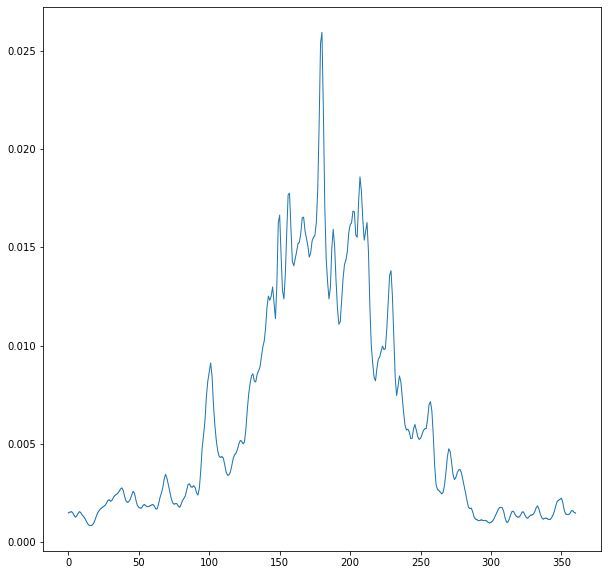

In [61]:
mission = 'Planck'

factor = 1

obs = fits.open(path + mission + '/regridded/temp/planck_Dust-GNILC-F857_regridded.fits')
obs_error = fits.open(path + mission + '/regridded/temp/planck_Dust-GNILC-F857_regridded_error.fits')
pprint(obs[0].header)
print(obs[0].shape)
print(obs[0].data.max(), obs[0].data.mean())
print(obs_error[0].data.max(), obs_error[0].data.mean())
plt.figure(figsize=(10, 10))
plt.plot(obs[0].data[:, :][89:91, ::-1].mean(0), lw=1)
plt.fill_between(np.arange(obs[0].data[:, :][89:91, ::-1].mean(0).size),
                 obs[0].data[:, :][89:91, ::-1].mean(0)-factor*obs_error[0].data[:, :][89:91, ::-1].mean(0),
                 obs[0].data[:, :][89:91, ::-1].mean(0)+factor*obs_error[0].data[:, :][89:91, ::-1].mean(0),
                 alpha=0.7)

In [56]:
5*obs_error[0].data[:, :][85:95, ::-1].mean(0).min()

0.00012429775779310148

In [72]:
np.ix_([0, -1], [0, 1, 2])

(array([[ 0],
        [-1]]),
 array([[0, 1, 2]]))

In [73]:
np.nanmean([np.nan, np.nan])

/tmp/ipykernel_550699/2006840581.py:1: RuntimeWarning: Mean of empty slice
  np.nanmean([np.nan, np.nan])


nan